In [2]:
#Data Manipulation
import numpy as np
import pandas as pd

#Visualiazation
import matplotlib.pyplot as plt
import missingno 
import seaborn as sns

#Managing Warnings
import warnings
warnings.filterwarnings('ignore')

#Plot the Figures Inline
%matplotlib inline


# 1导入数据

In [3]:
df_train = pd.read_csv(r'C:\Users\16925\Desktop\Kaggle\Titanic\train.csv')
df_test = pd.read_csv(r'C:\Users\16925\Desktop\Kaggle\Titanic\test.csv')


In [4]:
#将两组数据合并 重置索引   并不将旧索引添加为新的一列
df_all = pd.concat([df_train,df_test]).reset_index(drop=True)
df_all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
#展示所有种类特征 O的意思是object  表示对非数值型的变量进行统计
df_all.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [6]:
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1粗略观察数据

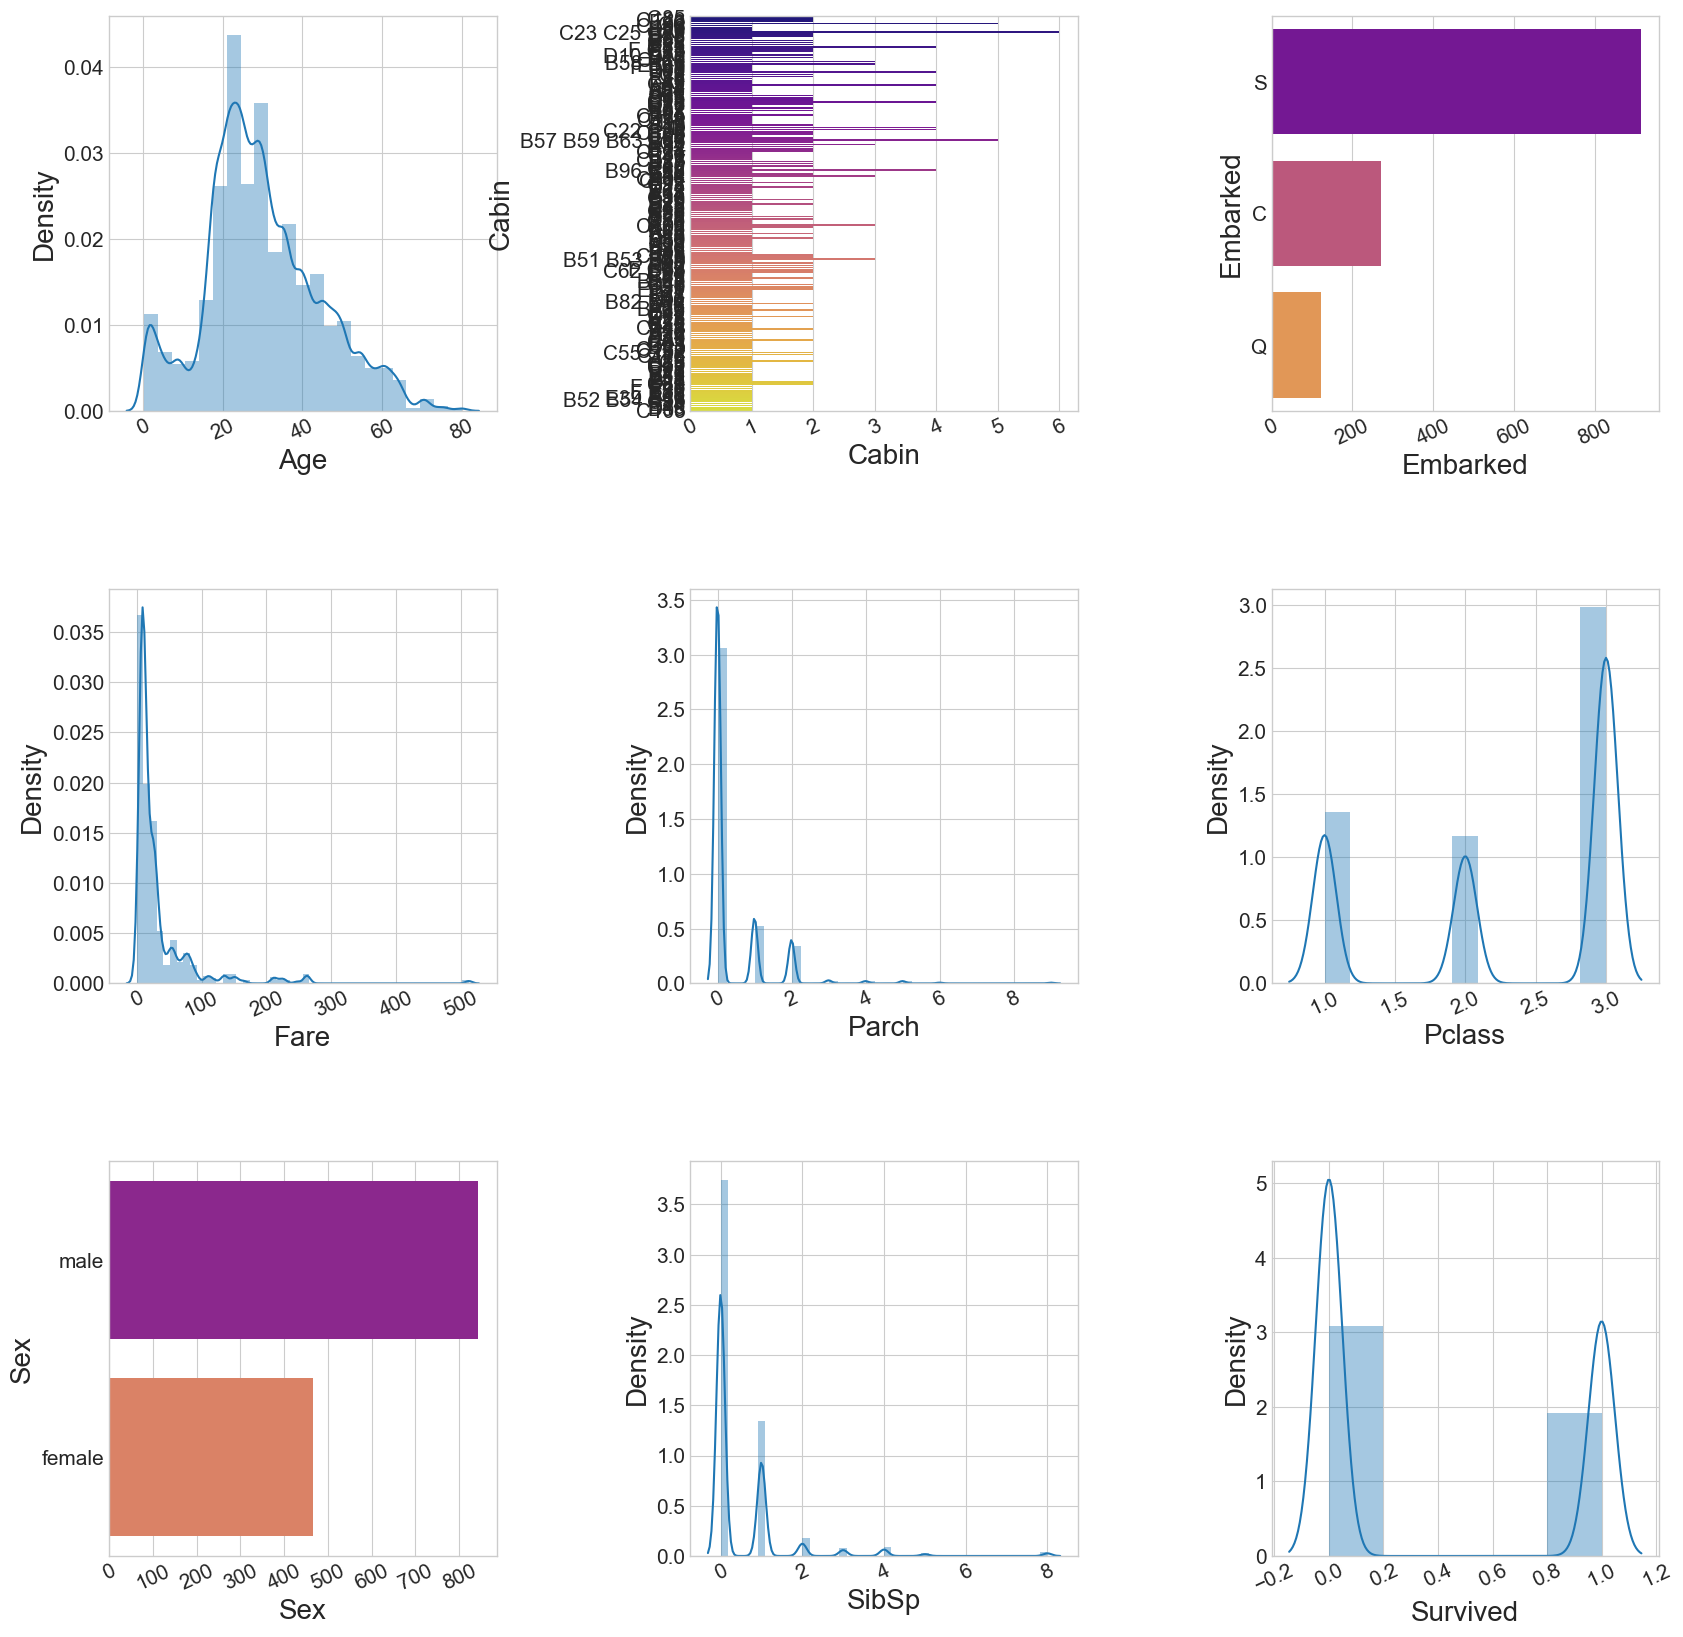

In [7]:
#单特征展示
#导入数学函数
import math
#plot_distribution函数用来绘制每一列的分布图,dataset为数据集,通常是一个DataFrame,cols=5为每行展示的图表数量默认为5,width和height为图表尺寸,单位为英寸,hspace和wspace为子图的垂直和水平间距。
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-v0_8-whitegrid')
    #创建一个新的图表 设置宽度高度
    fig = plt.figure(figsize=(width,height))
    #调整子图间距
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
   #通过向上取整来获取数据集的列数  如果不能整除就会多一行
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #遍历数据集的每一列
    for i, column in enumerate(dataset.columns):
       #在图表上添加一个子图 rows是行数  cols是列数 i+1是当前子图的位置
        ax = fig.add_subplot(rows, cols, i + 1)        
#ax.set_title(column)
       #设置每个子图的x轴标签为当前列名 字体大小为0
        plt.xlabel(column, fontsize=20)
        #设置y轴标签为空字符串
        plt.ylabel('',fontsize=20)
        #设置标签的字体大小为5
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)        
        #检查当前列的数据类型是否为object  即字符串或类别变量
        if dataset.dtypes[column] == object:
            #使用seaborn的countplot绘制柱状图 y=column表示将列的值绘制在y轴,palette是指定颜色调色板
            g = sns.countplot(y=column, data=dataset,palette='plasma')
          #将x轴的刻度标签旋转25度
            plt.xticks(rotation=25)        
        else:            
#绘制直方图，频数h   kde_kws是一个字典 bw为0.1表示曲线平滑程度较高 值越大越高         
            g = sns.distplot(dataset[column],kde_kws={'bw': 0.1})
            plt.ylabel(ylabel='Density',fontsize=20)
            plt.xticks(rotation=25)                
#调用函数  调用数据中的这些变量  调整部分参数
plot_distribution(df_all[['Age','Cabin','Embarked','Fare','Parch','Pclass','Sex','SibSp','Survived']], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)
plt.show()

## 1.2查看年龄和多种因素的存活率

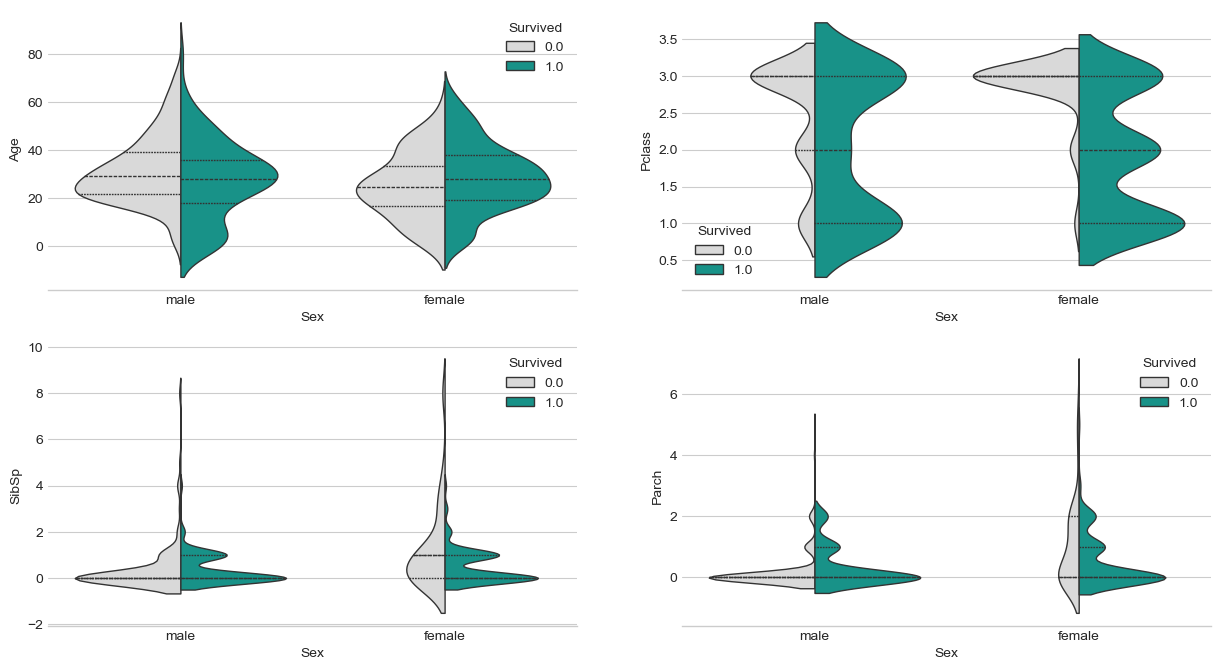

In [8]:
#创建一个图形对象  大小为15×8英寸
fig = plt.figure(figsize=(15,8))
#创建一个2行2列的网格,选择第一个位置(左上角)来绘制第一个小提琴图
plt.subplot(2,2,1)
#以sex作为x轴  age作为y轴  根据survived进行分组  分为生存和死亡两组
#splite = True表示将小提琴图分为两部分  左边显示死者  右边显示生者  inner=quart为内部显示四分位数 表示数据的分布  linewidth=1为设置小提琴图边界线的宽度  palette为设置两组的颜色  sns.despine(left = True)表示移除左边的坐标轴
sns.violinplot(data = df_all,x="Sex",y="Age",hue="Survived",
               split=True,inner="quart",linewidth=1,
               palette={1:"#04A699",0:".85"})
sns.despine(left=True)
#绘制sex和pclass的小提琴图
plt.subplot(2,2,2)
sns.violinplot(data = df_all,x="Sex",y="Pclass",hue="Survived",
               split=True,inner="quart",linewidth=1,
               palette={1:"#04A699",0:".85"})
sns.despine(left=True)

#绘制sex和sibsp的小提琴图
plt.subplot(2,2,3)
sns.violinplot(data = df_all,x="Sex",y="SibSp",hue="Survived",
               split=True,inner="quart",linewidth=1,
               palette={1:"#04A699",0:".85"})
sns.despine(left=True)

#绘制Sex和Parch的小提琴图
plt.subplot(2,2,4)
sns.violinplot(data=df_all, x="Sex", y="Parch", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)
plt.show()

## 1.3查看一下部分特征对生存率的影响

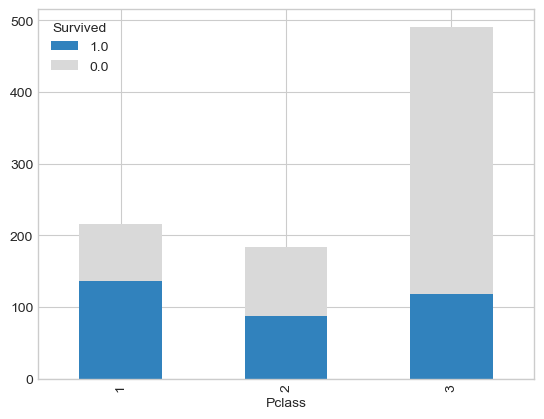

In [9]:
#Pclass和生存率之间的关系
#按Pclass（舱位等级）对survived进行分组
s_pclass = df_all['Survived'].groupby(df_all['Pclass'])
#统计每个Pclass中的幸存者和非幸存者   用unstack将按survived分组的series转换为dataframe  
s_pclass = s_pclass.value_counts().unstack()
#重新排列顺序  将幸存者(1.0)和非幸存者(0,0)按顺序排列
s_pclass = s_pclass[[1.0,0.0]]
#绘制一个堆叠条形图  kind=bar指定图表类型为条形图  stacked=True表示使条形图堆叠起来 分别显示幸存者和非幸存者的数量  然后指定颜色
s_pclass.plot(kind='bar',stacked=True,colormap='tab20c')
plt.show()

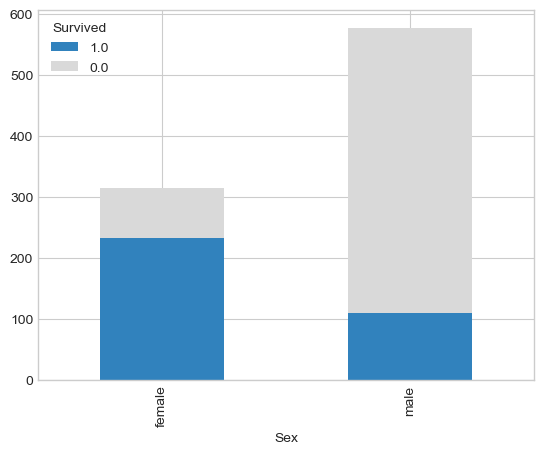

In [10]:
#性别和生存率之间的关系
s_sex = df_all['Survived'].groupby(df_all['Sex'])
s_sex = s_sex.value_counts().unstack()
s_sex = s_sex[[1.0, 0.0]]
s_sex.plot(kind='bar', stacked=True, colormap='tab20c')
plt.show()

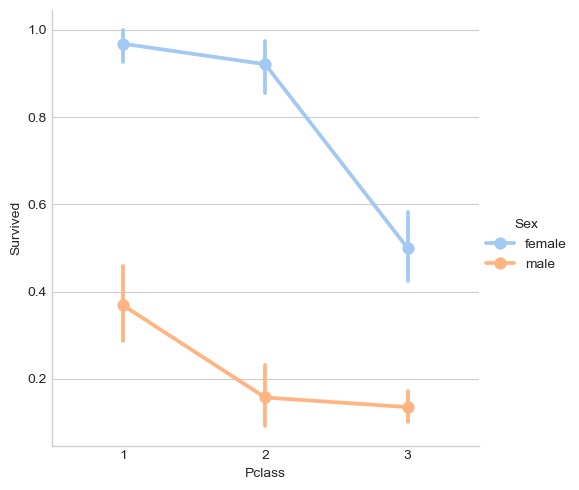

In [11]:
#绘制一个分类点图catplot  展示不同性别在不同舱位中的幸存情况   hue=sex表示根据性别设置不同颜色  kind=point即显示每个分类的统计结果  edgecolor为设置边框颜色
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", 
            palette="pastel", 
            data=df_all)
plt.show()

## 1.4缺失值的显示

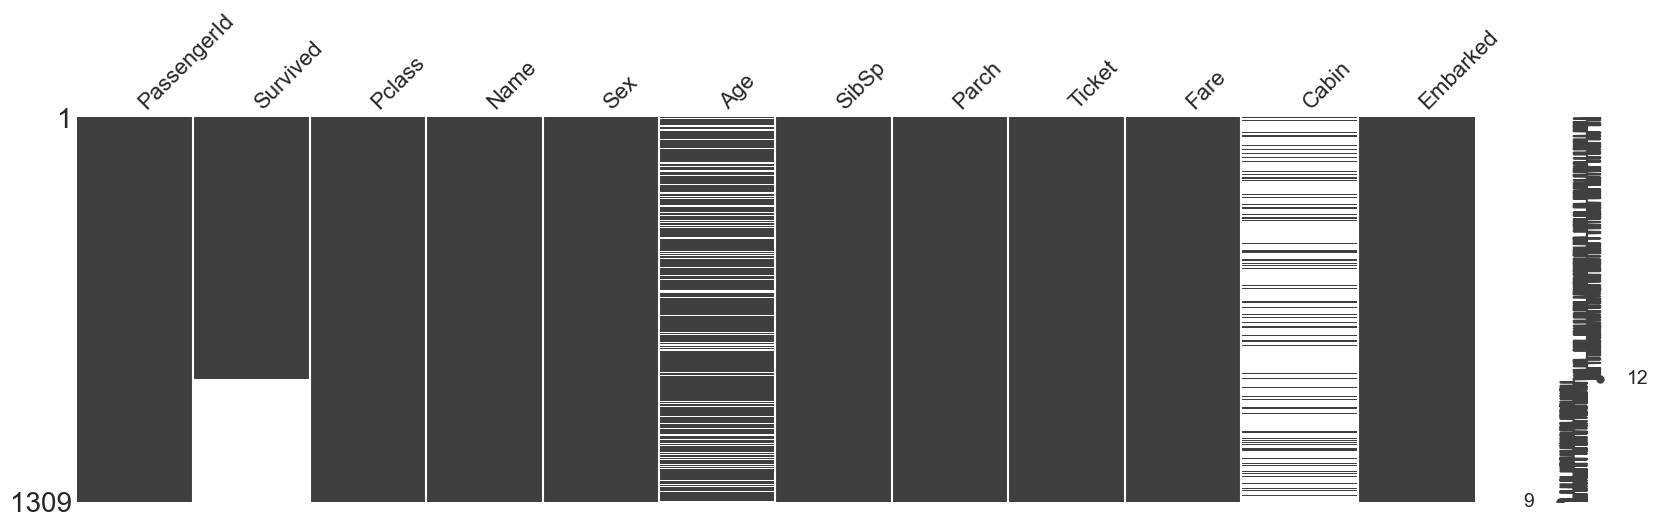

In [12]:
#可视化缺失数据  展示数据集中的缺失值矩阵  缺失值用白色区域表示
missingno.matrix(df_all,figsize=(20,5))
plt.show()

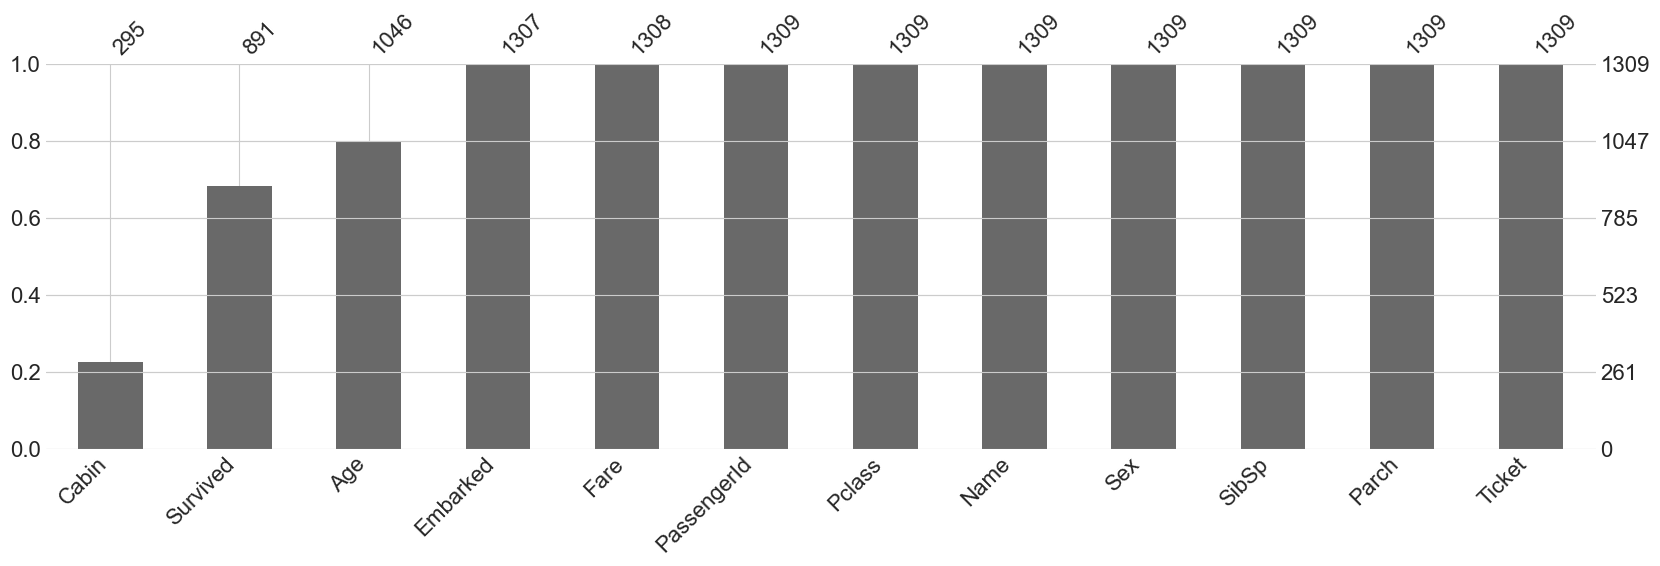

In [13]:
#展示缺失值的条形图 sort='ascending' 表示按缺失值比例从小到大排序
missingno.bar(df_all,sort='ascending',figsize=(20,5))
plt.show()

# 2数据清洗

In [14]:
#将Embarked列中的缺失值填充为 S
df_all['Embarked'] = df_all['Embarked'].fillna('S')
df_all['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [15]:
#填充缺失的Cabin列  用U(Unknown)进行填充
df_all['Cabin'] = df_all['Cabin'].fillna('U')
df_all['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [16]:
#填充Fare列的缺失值
df_all[df_all['Fare'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [17]:
#通过Pclass == 3且Embark =='S'和Cabin =='U'的条件,找到具有相似条件的行 然后使用这些行的Fare的均值来填充缺失值
df_all['Fare'] = df_all['Fare'].fillna(df_all[(df_all['Pclass'] == 3)&(df_all['Cabin'] == 'U')&(df_all['Embarked'] =='S')]['Fare'].mean())

## 2.1年龄缺失值处理

In [23]:
#使用.iloc按位置索引列  :表示选取所有行  选取的数字代表指定列
missing_age_df = df_all.iloc[:,[1,2,4,5,6,7,8,9,10,11]]
#机器学习不能直接处理分类数据  将sex embarked cabin转换为数值类型   factorize会将每个分类变量映射为整数
missing_age_df['Sex']=missing_age_df['Sex'].factorize()[0]
missing_age_df['Embarked'] = missing_age_df['Embarked'].factorize()[0]
missing_age_df['Cabin']=missing_age_df['Cabin'].factorize()[0]
missing_age_df['Ticket']=missing_age_df['Ticket'].factorize()[0]
#查看与年龄相关性最高的特征  选择相关性较强的特征用于训练模型
missing_age_df.corr()['Age'].sort_values() #升序排列
#降序排列missing_age_df.corr()['Age'].sort_values(ascending=False)

Pclass     -0.408106
SibSp      -0.243699
Parch      -0.150917
Survived   -0.077221
Sex        -0.063645
Embarked    0.047410
Ticket      0.081549
Fare        0.177531
Cabin       0.272991
Age         1.000000
Name: Age, dtype: float64

In [61]:
##如果筛选出相关度比较高的特征采用的是
#missing_age_df = pd.DataFrame(missing_age_df[['Age','Parch','SibSp','Fare','Pclass','Cabin']])

In [44]:
#选择age不缺失的行为作为训练集
age_train = missing_age_df[missing_age_df['Age'].notnull()]
#选择age缺失的行为作为测试集
age_test = missing_age_df[missing_age_df['Age'].isnull()]
#利用随机森林构建模型
#训练集x去掉标签age y保留标签age
age_train_x = age_train.drop(['Age'],axis=1)
age_train_y = age_train['Age']
#测试集y去掉标签age
age_test_x = age_test.drop(['Age'],axis=1)
from sklearn.ensemble import RandomForestRegressor
#random_state=0表示保证每次运行的结果一致  n_estimators =2000表示指定随机森林决策树的数量  值越大模型越稳定  
#n_jobs=-1  -1表示使用所有CPU核心  如果设置为1则只用一个核心计算
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(age_train_x,age_train_y)
#评估模型并预测缺失的年龄
#rfr.score 打印模型在训练集的R平方  
print('模型得分:',rfr.score(age_train_x,age_train_y))
#预测年龄
#age_test_y = rfr.predict(age_test_x)
#将预测的年龄填充到原始数据集中    
#df_all.loc[df_all['Age'].isnull(),['Age']] = age_test_y


模型得分: 0.8808027709981524


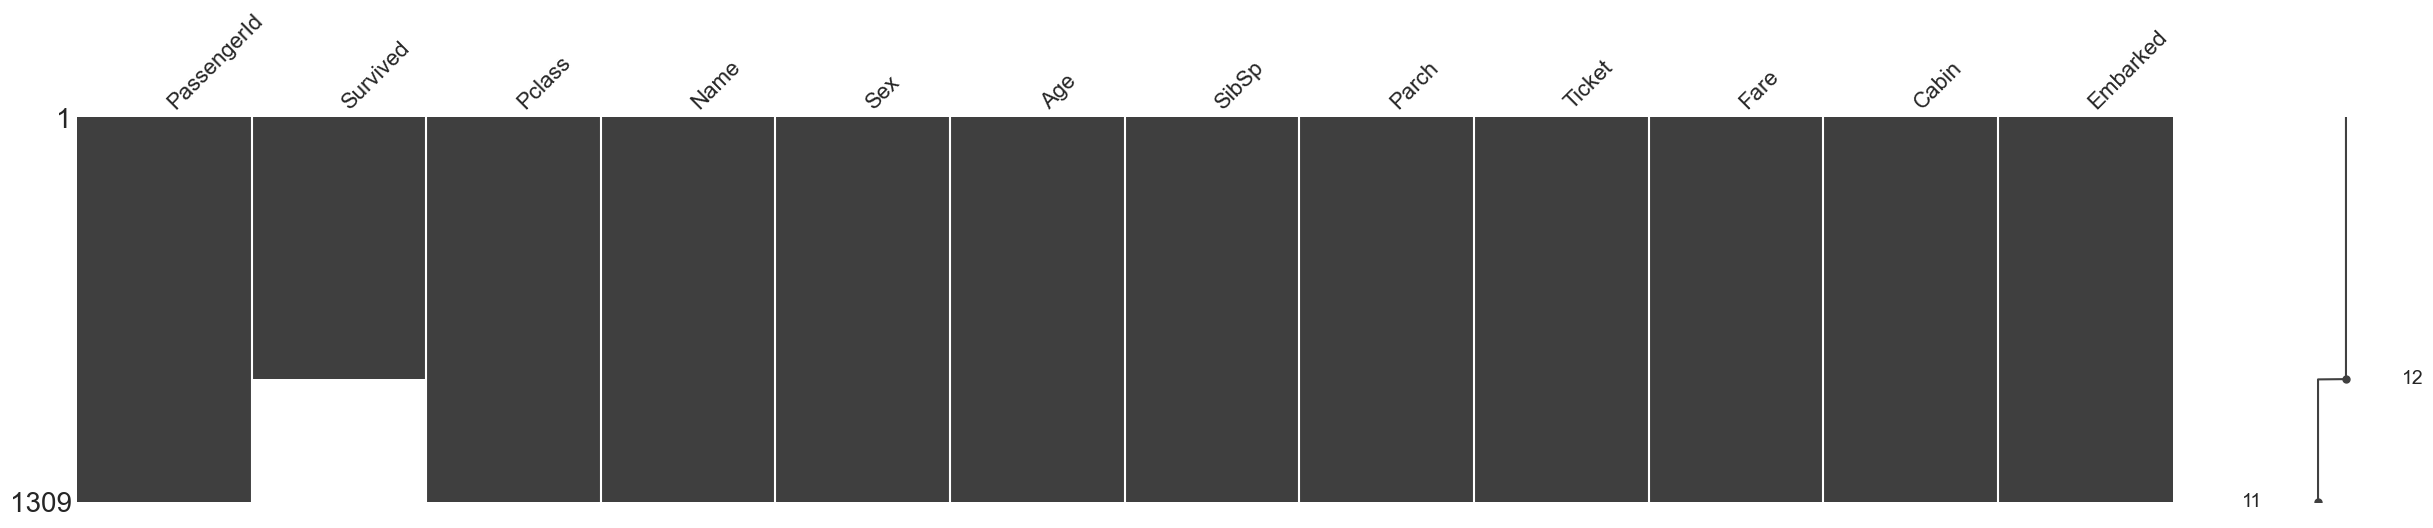

In [45]:
#检测预测的年龄数量 print(len(Age_test_y)) 
#检测缺失的age数量 prnt(df_all['Age'].isnull().sum())
#缺失值显示
missingno.matrix(df_all, figsize=(30,5))
plt.show()

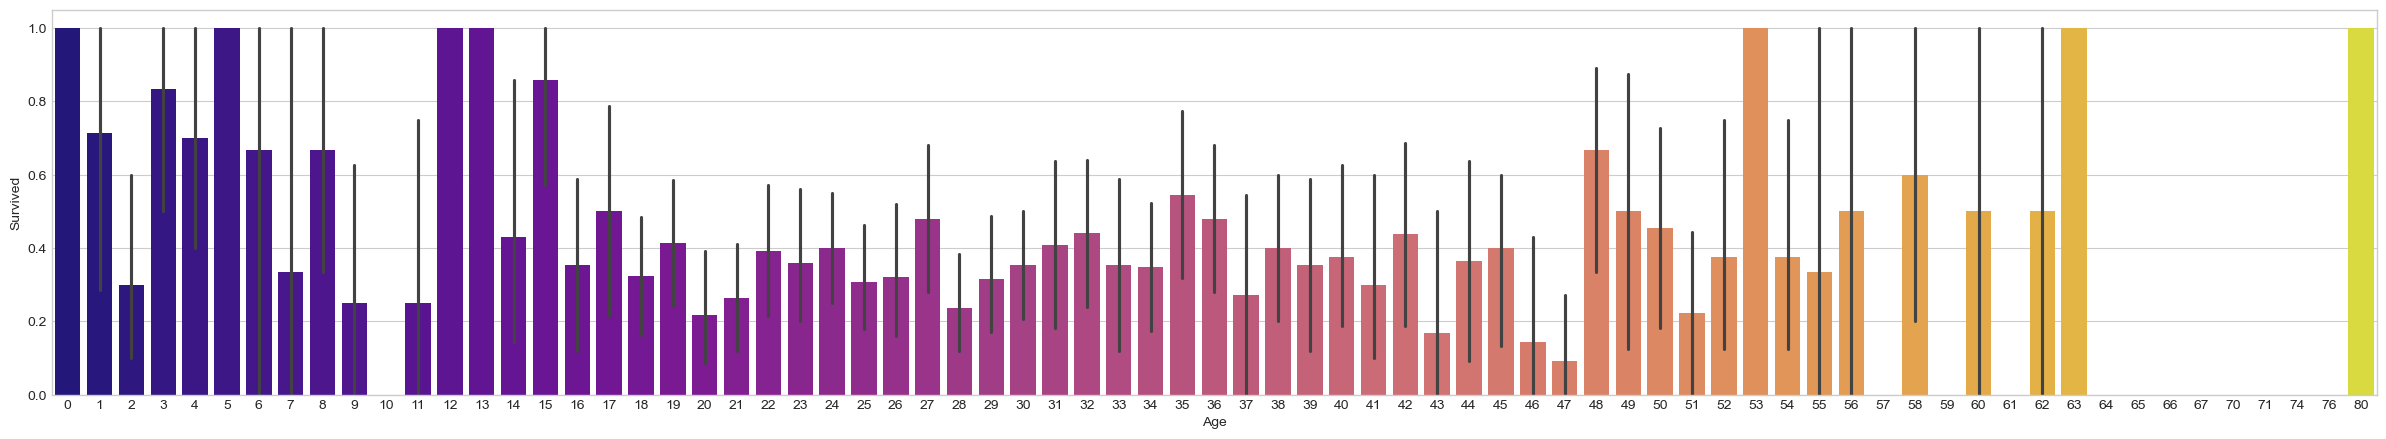

In [49]:
#显示Age和survived的关系 
#将Age列的数据类型转换为整数
df_all['Age']=df_all['Age'].astype(int)
#显示Age与Survived的关系 barplot为柱状图
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize = (30,5))
sns.barplot(x="Age",y="Survived",data=df_all,palette='plasma')
plt.show()

# 3 特征工程

## 3.1 补全Cabin

In [50]:
#采用lambda函数提取第一个字符  将多个舱位信息转换为只保留每个舱位的字母
df_all['Cabin'] = df_all['Cabin'].apply(lambda x:x[0])

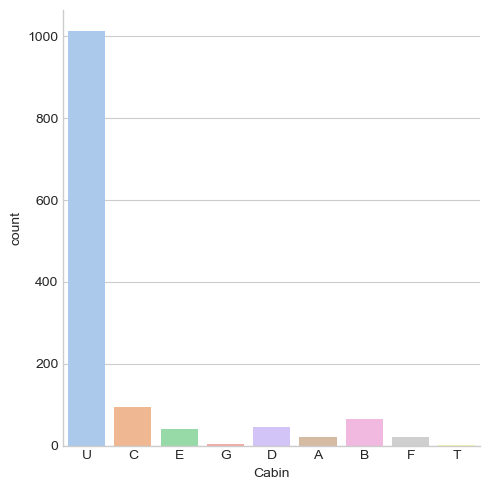

In [54]:
#使用catplot绘制一个基于cabin列的计数图  kind=count表示绘制计数图
sns.catplot(x="Cabin",kind="count",palette="pastel",data=df_all)
plt.show()

In [55]:
#对Cabin的缺失值进行处理  将非缺失的值标记为yes 将缺失值标记为no
df_all.loc[(df_all.Cabin != 'U'),'Cabin' ] ="Yes"
df_all.loc[(df_all.Cabin == 'U'),'Cabin' ] ="No"

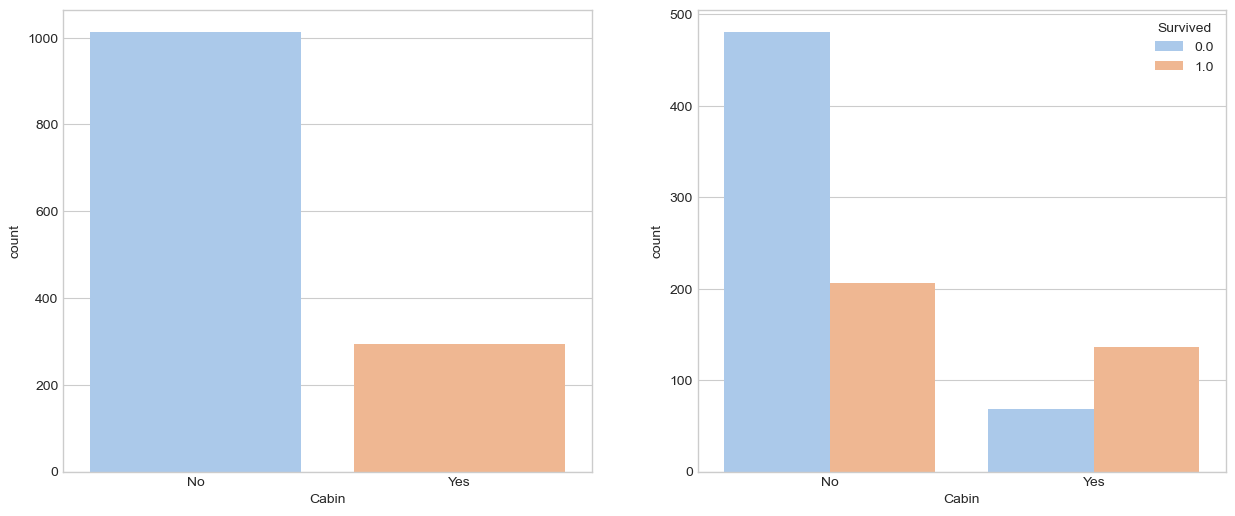

In [60]:
#绘制cabin列的两个条形图
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(15,6))
#将画布分为1行列 在第一个和第二个位置绘制子图
plt.subplot(1,2,1)
sns.countplot(x="Cabin",palette = "pastel", data=df_all)
#第二个子图按幸存与否对cabin进行分组
plt.subplot(1,2,2)
sns.countplot(x="Cabin",hue="Survived",palette="pastel",data=df_all)
plt.show()

## 3.2用最简单的模型获取Baseline
如果直接用大量特征转化和生成新特征很容易产生过拟合的现象 因此先做一个基础模型 看lb得分后再进行挖掘

In [63]:
#对数据进行特征工程 准备训练数据
#提取第二列之后的所有列
df_base = df_all.iloc[:,1:]
#将SEX的类别变量转换为数字0和1
df_base['Sex'] = df_base['Sex'].factorize()[0]
#对Embarked Pclass Cabin列进行独热编码  这些列包含类别信息 将他们转换为多个二进制列
df_base = pd.get_dummies(df_base,columns=['Embarked','Pclass','Cabin'])
#删除Name和Ticket列  这两列对模型训练没有贡献  inpalce=true的意思是在原数据上进行修改 不会产生新的dataframe
df_base.drop(['Name','Ticket'],axis =1,inplace=True)

In [75]:
#对age和fare进行标准化处理 使得这两列的数值在同一尺度范围内(均值为0 标准差为1)
#用standardscaler创建标准化器
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
#fit_transform对数据进行拟合并转换 将数据转换为标准正态分布 
#.reshape(-1,1) 将数据调整为二维数组 这是StandardScaler所需的格式
df_base['Age'] = std_scale.fit_transform(df_base['Age'].values.reshape(-1,1))
df_base['Fare'] = std_scale.fit_transform(df_base['Fare'].values.reshape(-1,1))
df_base.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_No,Cabin_Yes
0,0.0,0,-0.574948,1,0,-0.503292,False,False,True,False,False,True,True,False
1,1.0,1,0.616357,1,0,0.734743,True,False,False,True,False,False,False,True
2,1.0,1,-0.277122,0,0,-0.490242,False,False,True,False,False,True,True,False
3,1.0,1,0.392987,1,0,0.383183,False,False,True,True,False,False,False,True
4,0.0,0,0.392987,0,0,-0.487825,False,False,True,False,False,True,True,False
5,0.0,0,0.541900,0,0,-0.479931,False,True,False,False,False,True,True,False
6,0.0,0,1.807661,0,0,0.359257,False,False,True,True,False,False,False,True
7,0.0,0,-2.064078,3,1,-0.235996,False,False,True,False,False,True,True,False
8,1.0,1,-0.202665,0,2,-0.428211,False,False,True,False,False,True,True,False
9,1.0,1,-1.170600,1,0,-0.062069,True,False,False,False,True,False,True,False


In [76]:
#将数据集分为训练集和测试集
df_base_train = df_base[df_base['Survived'].notnull()]
df_base_test = df_base[df_base['Survived'].isnull()]

In [77]:
#划分训练集中的特征变量x和目标变量y 以及测试集中的特征变量X 
#从训练集中删除survived列 保留其他特征 训练集的目标变量为survived列 astype(float)为将数据转换为浮动类型
x_train = df_base_train.drop(['Survived'],axis = 1).astype(float)
y_train = df_base_train["Survived"].astype(float)
x_test = df_base_test.drop(['Survived'],axis =1).astype(float)

In [91]:
#使用逻辑回归模型训练数据
from sklearn.linear_model import LogisticRegression
#solver=liblinear 使用liblinear求解器 这个求解器适合于小型数据集
#C =1.0正则化参数 控制模型的复杂度 penalty='l1'为选择L1正则化(Lasso) 可以进行特征选择
#tol = 1e-6 优化算法的停止准则 设置为一个非常小的阈值 意味着算法会非常精准的收敛
clf = LogisticRegression(solver = 'liblinear',C=1.0,penalty='l1',tol=1e-6)
clf.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

In [92]:
#预测及导出结果
#对测试集进行预测 输出预测结果base_pred
base_pred = clf.predict(x_test)
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].values,'Survived':base_pred.astype(np.int32)})

#将预测结果保存为CSV文件
result.to_csv(r"C:\Users\16925\Desktop\Kaggle\Titanic\baseline.csv",index=False)
result.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


曲线中点: 0.8090610888559049 Gap: 0.02633351131611661


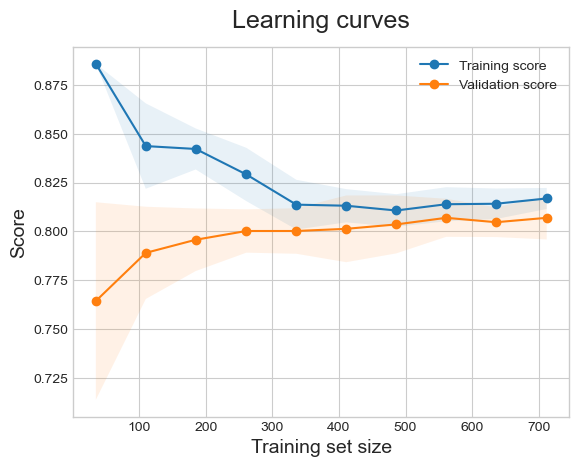

In [97]:
#绘制学习曲线(Learning Curve) 来评估模型在不同训练集大小下的表现
from sklearn.model_selection import learning_curve
#estimator模型 这里是clf 即LogisticRegression  np.linspace(.05,1.,10)表示生成了10个训练集大小 范围从5%到100%
#意思是生成10个训练集大小[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,1.0]这些训练集大小是相对于总训练集大小的比例 比如第一个训练集大小5%时 模型使用5%的数据进行训练 剩余的95%就是验证集
#当训练集数据为100%时 采用交叉验证的方法作为验证集
train_sizes, train_scores,validation_scores = learning_curve(
    estimator = clf, X = x_train,#机器学习的库里一般用大写的x表示特征变量
    y = y_train, train_sizes = np.linspace(.05,1.,10))
#在不同训练集大小下 训练集的平均分数
train_scores_mean = train_scores.mean(axis=1)
#验证集的平均分数
validation_scores_mean = validation_scores.mean(axis=1)
#计算训练集和验证集分数的标准差 表示分数的波动范围
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)
#计算并打印曲线的中点和间隔(Gap)
#训练集得分加上标准差表示训练集得分的上限  验证集得分减去标准差表示验证集得分的下限
#midpoint表示训练集和验证集的分数分布范围的中点 中点靠近训练集得分表示可能过拟合  中点偏向于验证集得分说明模型可能较为泛化
#diff表示训练集和验证集分数的间隔 反映了模型是否过拟合  较大的间隔可能意味着过拟合
midpoint = ((train_scores_mean[-1]+train_scores_std[-1])+(validation_scores_mean[-1]-validation_scores_std[-1]))/2
diff = (train_scores_mean[-1]+train_scores_std[-1])-(validation_scores_mean[-1]-validation_scores_std[-1])
print("曲线中点:",midpoint,"Gap:",diff)
#通过fill_between函数填充训练集和验证集分数的标准差区域 形成误差带
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1)
plt.fill_between(train_sizes,validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std,alpha=0.1)
#用plot画出训练集和验证集的平均分数 o代表圆点 -代表实线
plt.plot(train_sizes,train_scores_mean,'o-',label = 'Training score')
plt.plot(train_sizes,validation_scores_mean,'o-',label = 'Validation score')
#设置标签 标题 字体 最后用plt.legend()显示图例
plt.ylabel('Score',fontsize=14)
plt.xlabel('Training set size',fontsize = 14)
plt.title('Learning curves',fontsize = 18,y=1.03) #y=1.03表示标题的位置
plt.legend()
plt.show()



### 判断是否过拟合
1. 通过Gap判断 过拟合：如果训练集得分远高于验证集得分，表明模型在训练集上表现很好，但在新的数据（验证集）上效果较差，说明模型可能学到了训练集的噪声而不是实际规律。
欠拟合：如果训练集和验证集得分都很低，说明模型无法有效地从数据中学习，可能是因为模型过于简单或训练不足。
2. 通过曲线的趋势判断 如果训练集和验证集的得分都平稳并逐渐增加，说明模型的泛化能力很好，且模型在所有训练集大小下表现都很稳定。
如果训练集得分持续高，而 验证集得分停滞不前，说明模型可能过拟合，已经学会了训练数据的细节，但对验证集（新数据）的泛化能力较差。
3. 中点 midpoint: 0.8091，接近训练集和验证集得分的平均水平，这意味着模型的表现是平衡的，没有明显的过拟合。

## 3.3继续新增特征

In [98]:
#pd.DataFrame()用来创建一个新的DataFrame对象 
#df_base.columns[1:]表示切片操作 即去掉df_base中第一个列
#clf.coef_是逻辑回归clf的一个属性 它包含了每个特征的回归系数 正的系数表示有正向影响
#clf.coef_返回一个二维数组(形状通常是(1,n_features)) .T是矩阵的转置操作 转置后变成了多行一列的数组
pd.DataFrame({"columns": list(df_base.columns)[1:],"coef":list(clf.coef_.T)})


,columns,coef
0,Sex,[2.6182327109869954]
1,Age,[-0.596618846978248]
2,SibSp,[-0.3420504175410293]
3,Parch,[-0.10619753428036013]
4,Fare,[0.08829108532452207]
5,Embarked_C,[0.0]
6,Embarked_Q,[0.0]
7,Embarked_S,[-0.36767915980841925]
8,Pclass_1,[0.4405563337330041]
9,Pclass_2,[0.0]


In [99]:
#提取增加新特征
df_improve = df_all.iloc[:,1:]
df_improve.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,No,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Yes,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,No,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Yes,S
4,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,No,S


In [101]:

#Familysize:这是通过将Parch(父母和子女数)与Sibsp(兄弟姐妹或配偶数)相加得出一个新特征 该特征反映了每个乘客的家庭大小
df_improve['Familysize']=df_improve['Parch']+df_improve['SibSp']


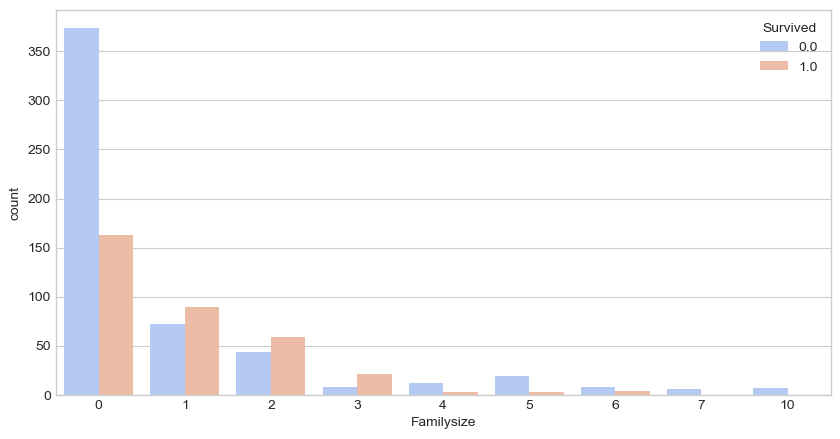

In [102]:
#sns.countplot绘制Familysize的分布 并通过hue='Survived'参数来区分生死
#palette用来设置颜色
fg = plt.figure(figsize=(10,5))
sns.countplot(x='Familysize',hue='Survived',data=df_improve,palette="coolwarm")
plt.show()

In [108]:
#根据上述图表的显示  新增定义一个是否孤单的特征
#用aloneDiction创建一个字典 将家庭大小为0设定为"是孤单的"(1)
#map() 将Familysize中等于0的值映射为1 fillna(0)是为了填充没有映射到的值(即Familysize非0的情况)
aloneDiction = {}
aloneDiction[0] = 1
df_improve['isAlone']=df_improve['Familysize'].map(aloneDiction).fillna(0)

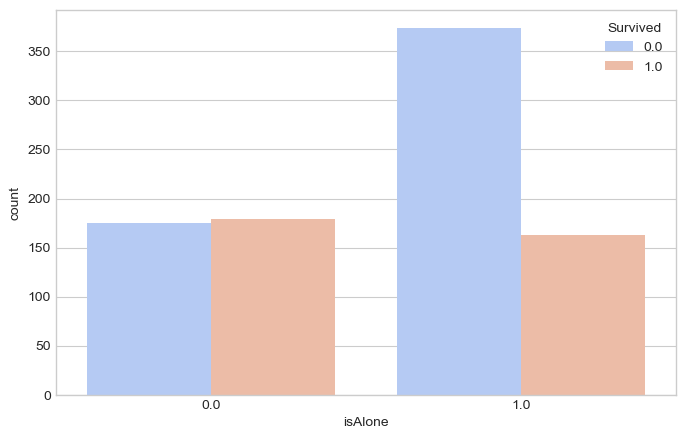

In [109]:
#绘制是否孤单与生存情况的关系
fg = plt.figure(figsize=(8,5))
sns.countplot(x='isAlone',hue='Survived',data=df_improve,palette="coolwarm")
plt.show()

In [110]:
#提取乘客的称谓  apply(lambda x ....)对name列中的每个元素应用一个函数
#x.split(',')[1]取的是名字的称谓部分("Last Name,Title.First Name")
#.split('.')[0]是将称谓部分(如Mr.)分离出来并去掉句点   .strip()用于除去空白字符
df_improve['Title'] = df_improve['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df_improve['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [111]:
#将称谓映射为性别
TitleDict = {}
TitleDict['Mr'] = 'Man'
TitleDict['Mlle'] = 'Woman'
TitleDict['Miss'] = 'Woman'
TitleDict['Mme'] = 'Woman'
TitleDict['Ms'] = 'Woman'
TitleDict['Mrs'] = 'Woman'
TitleDict['Master'] = 'Boy'
TitleDict['Jonkheer'] = 'Man'
TitleDict['Don'] = 'Man'
TitleDict['Sir'] = 'Man'
TitleDict['the Countess'] = 'Woman'
TitleDict['Dona'] = 'Woman'
TitleDict['Lady'] = 'Woman'
TitleDict['Capt'] = 'Man'
TitleDict['Col'] = 'Man'
TitleDict['Major'] = 'Man'
TitleDict['Dr'] = 'Man'
TitleDict['Rev'] = 'Man'

#map()函数将df_improve['Title']列的每个称谓替换为对应的性别
df_improve['Title'] = df_improve['Title'].map(TitleDict)
df_improve['Title'].value_counts()



Title
Man      783
Woman    465
Boy       61
Name: count, dtype: int64

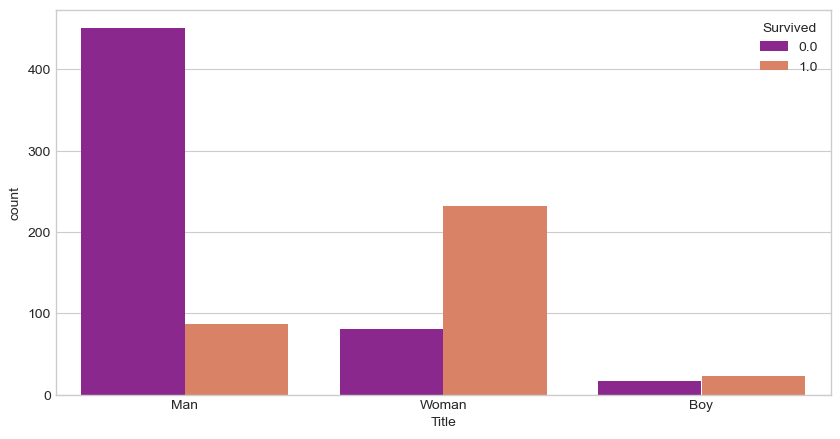

In [114]:
#绘制称谓与生存情况的关系
fg = plt.figure(figsize=(10,5))
sns.countplot(x='Title',hue='Survived',data=df_improve,palette="plasma")
plt.show()

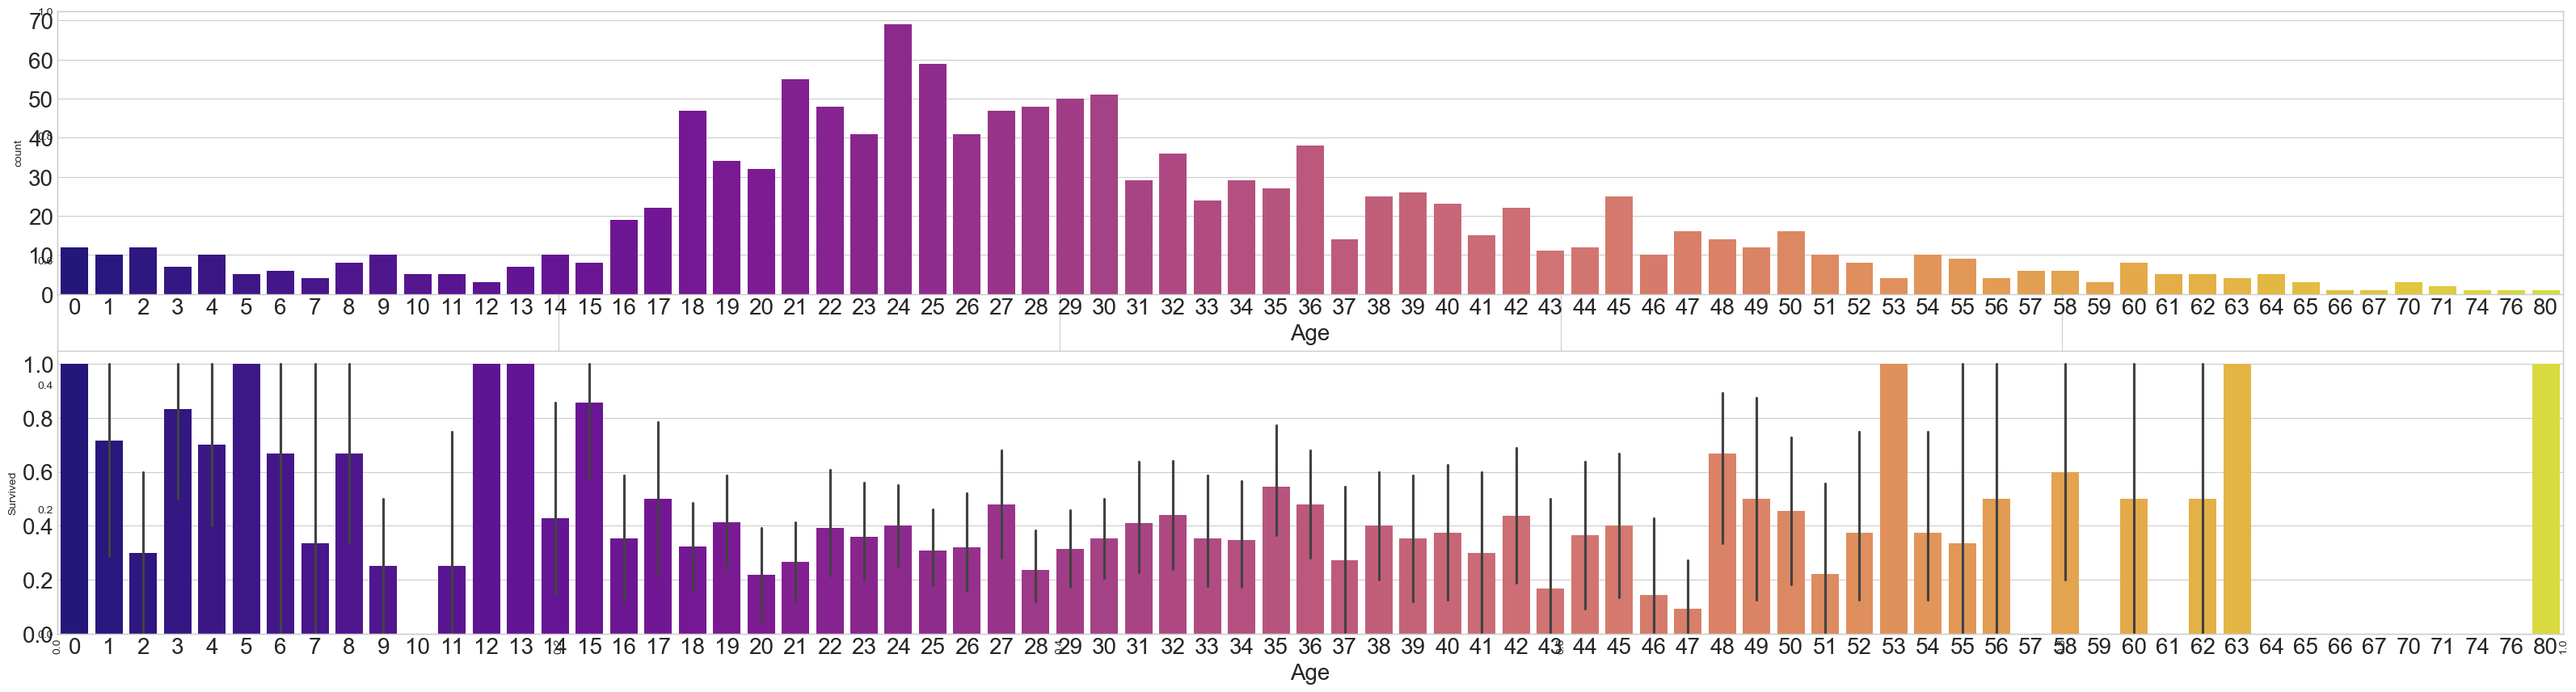

In [115]:
#年龄与生存情况的关系
#第一张子图展示了各个年龄段的乘客数量
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
plt.subplot(2,1,1)
sns.countplot(data = df_improve,x='Age',palette='plasma')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Age',fontsize = 20)

#第二张子图展示了不同年龄段的生存比例
plt.subplot(2,1,2)
sns.barplot(data=df_improve,x='Age',y='Survived',palette='plasma')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)

plt.show()

**作者说age无论是作为离散还是连续都不太能提高预测准度，反而成为噪音**

原因可能如下：有些年龄段的乘客数量非常集中（例如 20 到 30 岁之间的乘客数量很多），而有些年龄段的乘客数量比较稀疏（例如 60 岁以上的乘客数量较少）。
乘客数量的不均衡可能会导致模型难以从较少的样本中学习到有效的信息，尤其是对那些少数年龄段（例如老年人或儿童）的预测可能不准确。

在某些年龄段（如 20-30 岁）生存率较高，而其他年龄段（如 60 岁以上）生存率较低。
不同年龄段的生存率变化较大，说明年龄确实可能影响生存情况，但由于样本数量差异较大，模型可能会受到年龄数据分布的影响，尤其是在数据较少的年龄段（如老年人）上。

**进一步的改进：**
调整年龄分布：对年龄数据进行更合理的分箱处理，或者使用年龄区间来平衡各个年龄段的样本数量，避免数据不均导致的噪音。
结合其他特征：结合性别、舱位等其他特征，对年龄进行更精准的填充和预测。
避免过度依赖：避免过度依赖某个特征（如年龄），可以通过正则化等方法减轻特征的过拟合影响。

In [119]:
#接下来作者要提取age<16或者<12的这部分人作为单独的一组或者将child和women归为一类根据是否幸存来分组
#通过df_improve.loc[df_improve['Age']<=12]提取年龄小于或等于12岁的乘客
childGroup = df_improve.loc[df_improve['Age']<=12]
childGroup.value_counts('Survived')


Survived
1.0    42
0.0    29
Name: count, dtype: int64

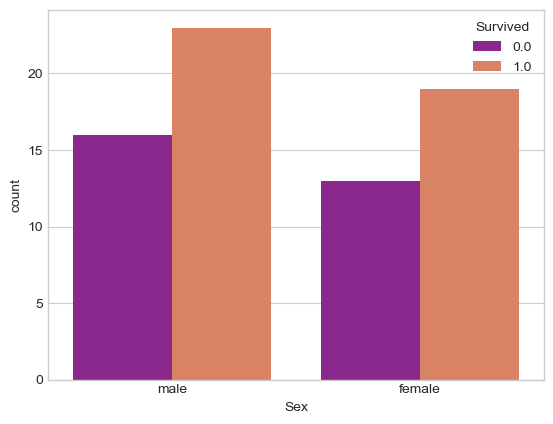

In [120]:
#绘制儿童的性别与生存情况的关系
sns.countplot(data=childGroup,x='Sex',hue='Survived',palette='plasma')
plt.show()

In [122]:
#修正儿童性别与生存情况
#分别选取在生存的男性儿童和在死亡的女性儿童的索引
child_female = childGroup[(childGroup['Sex'] =='male') & (childGroup['Survived'] == 1)].index
child_male = childGroup[(childGroup['Sex'] == 'female') & (childGroup['Survived'] == 0)].index

#修改儿童的性别 将生存的男性儿童的性别改为'female' 将死亡的女性儿童的性别改为'male'
df_improve['Sex'][child_female] = 'female'
df_improve['Sex'][child_male] = 'male'

In [124]:
#删除不必要的列 因为这些列在后续的模型训练中不需要
df_improve.drop(['Name','Ticket','SibSp','Parch','Age','Fare'],axis=1,inplace=True)

In [125]:
#为分类变量进行编码
#factorize 将类别变量 如Sex和Cabin转换为0和1
df_improve['Sex'] = df_improve['Sex'].factorize()[0]
df_improve['Cabin'] = df_improve['Cabin'].factorize()[0]

In [127]:
#get_dummies() 将Tittle Pclass Embarked Familysize 列进行独热编码 将分类变量转换为多个二进制列
df_improve = pd.get_dummies(df_improve,columns=['Title','Pclass','Embarked','Familysize'])


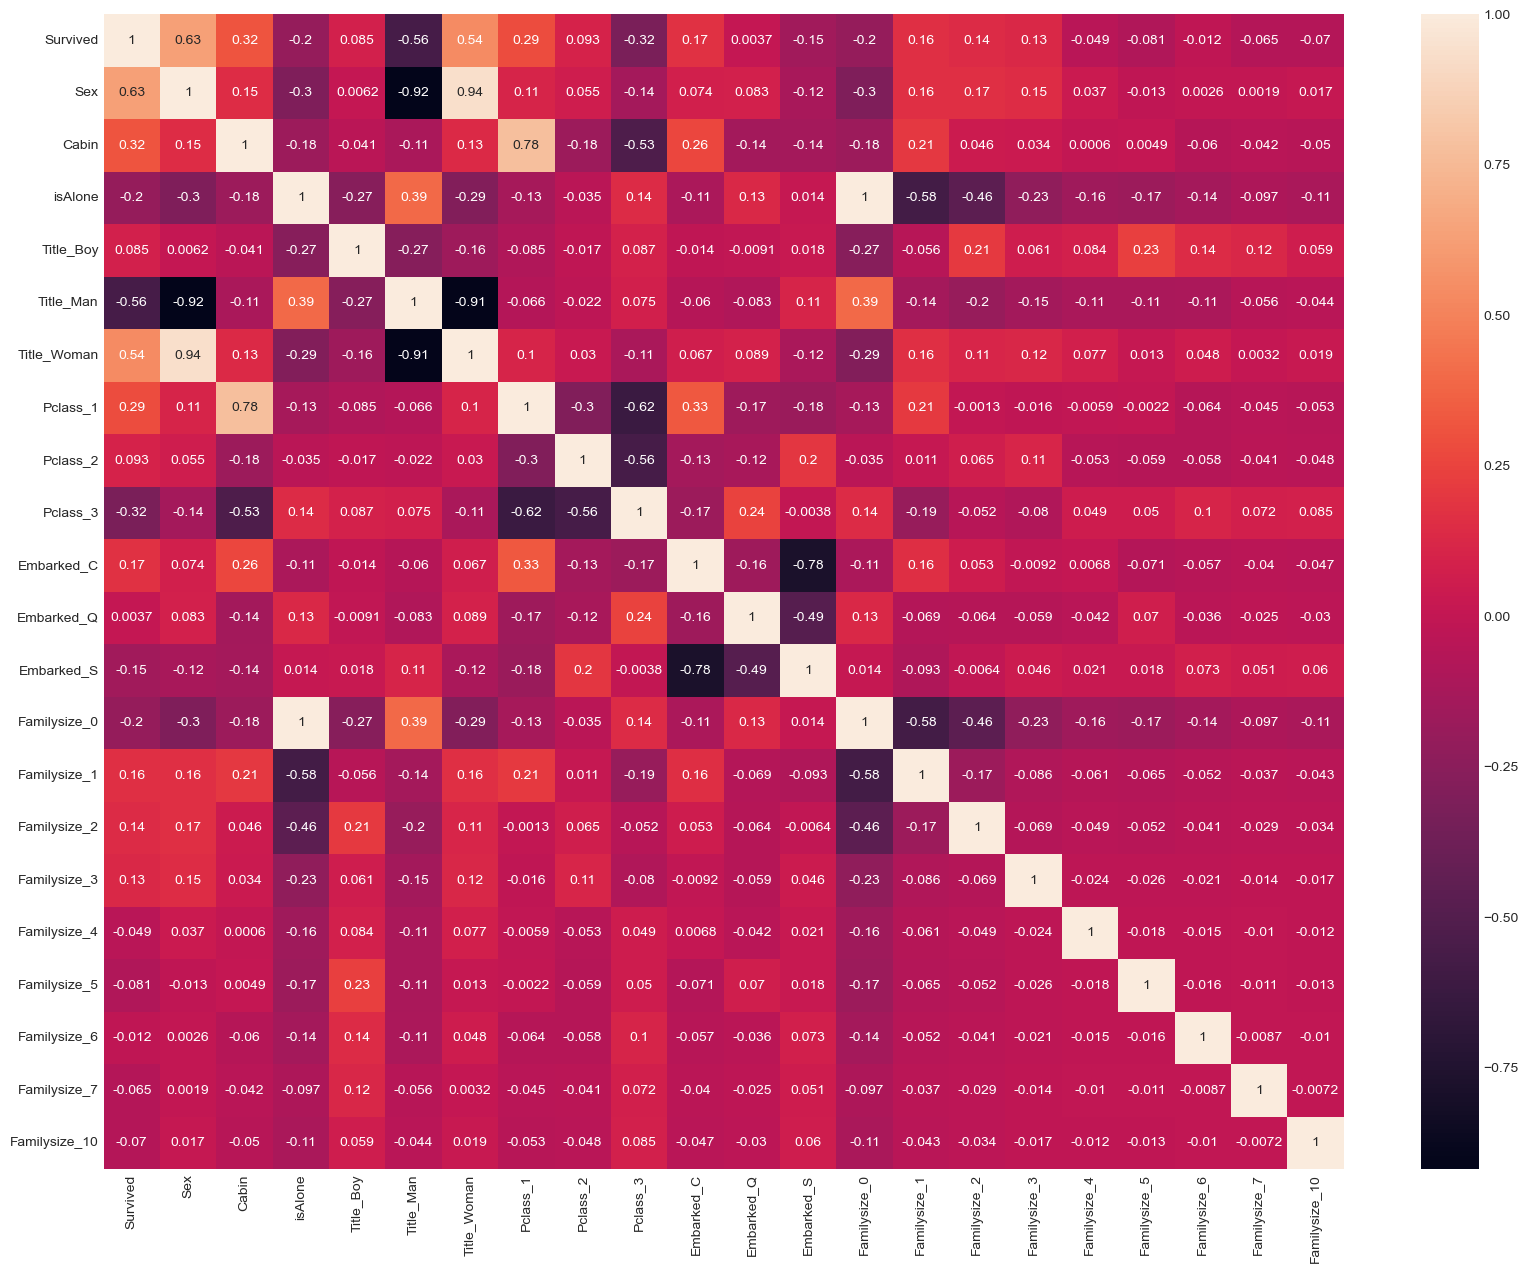

In [130]:
#绘制相关性热图
plt.figure(figsize=(20,15))
#sns.heatmap()：绘制数据集中各个特征之间的相关性热图，并显示相关系数。
#annot表示是否在每个热图单元格中注释(显示数值) True表示显示
sns.heatmap(df_improve.corr(),annot=True)
plt.show()

In [133]:
#准备训练和测试数据
#imp_train:提取Survived列不为空的样本作为训练数据 
#final_test:提取Survived列为空的样本数据作为测试数据
imp_train = df_improve[df_improve.Survived.notnull()]
final_test = df_improve[df_improve.Survived.isnull()].iloc[:,1:]
X_train = imp_train.iloc[:,1:]
y_train = imp_train.iloc[:,0]

In [134]:
#设置随机数种子确保生成相同的随机序列
seed = 2020
np.random.seed(seed)

In [138]:
#导入Keras库  Keras 是一个高级神经网络 API，常用于构建和训练深度学习模型。Keras 可以在 TensorFlow、Theano 或 CNTK 后端运行。
import keras
#Sequential 是 Keras 中的一种模型类型，它表示网络层按顺序堆叠（线性堆叠），即每一层的输入来自上一层的输出。
from keras.models import Sequential
#Dense表示一个全连接层，每个神经元与前一层的所有神经元连接。它是构建神经网络时常用的层。
from keras.layers import Dense
#初始化ANN 通过 Sequential() 初始化一个空的神经网络模型。该模型将逐层添加不同的网络层。
classifier = Sequential()

#添加输入层和第一隐藏层
#classifier.add(Dense(...))：向网络中添加一层 Dense（全连接层）。
#units = round((X_train.shape[1] + 1) / 2)：设置该层的 神经元数量。X_train.shape[1] 表示训练数据特征的数量（即输入的特征数）。通过 round((X_train.shape[1] + 1) / 2) 计算得到隐藏层神经元的数量。这里使用了一种常见的经验公式：神经元数量设置为输入特征数的一半。
#kernel_initializer = 'uniform'：指定权重初始化方法，'uniform' 表示在均匀分布中随机初始化权重，避免神经网络训练过程中权重过大或过小的影响。
#activation = 'relu'：设置该层的激活函数为 ReLU（Rectified Linear Unit），它是常用的激活函数，可以有效避免梯度消失问题。
#input_dim = X_train.shape[1]：设置输入层的特征数量，即每个输入样本包含的特征数量。X_train.shape[1] 是训练集的特征数，表示每个样本的输入维度。

classifier.add(Dense(units = round((X_train.shape[1] + 1) /2),kernel_initializer='uniform',activation='relu',input_dim = X_train.shape[1]))

#添加第二个隐藏层
#这一层与第一隐藏层类似，但这里没有 input_dim 参数，因为这是第二个隐藏层，输入会来自第一层的输出。
#继续使用 ReLU 激活函数，并将神经元数量设为与第一隐藏层相同。
classifier.add(Dense(units = round((X_train.shape[1] +1)/2),kernel_initializer = 'uniform', activation = 'relu'))

#添加输出层
#units = 1：输出层只有一个神经元，因为这是一个二分类任务，输出是单个概率值，表示样本属于某一类的概率。
#activation = 'sigmoid'：输出层使用 Sigmoid 激活函数，它会将输出值映射到 0 和 1 之间，适用于二分类问题。Sigmoid 函数可以将结果转化为概率值（0到1之间），因此适合二分类任务。
#不同类型的任务 对应着不同的 输出层结构 和 损失函数。 如果是 3 类分类任务，输出层的神经元数量应为 3。
#激活函数：对于多分类问题，通常使用 Softmax 激活函数。它将输出层的每个神经元值映射为一个概率，所有概率的和为 1。这样每个样本都会被分配到其中一个类别。

#损失函数：多分类问题使用 categorical_crossentropy 损失函数，而不是 binary_crossentropy：

classifier.add(Dense(units =1,kernel_initializer = 'uniform',activation='sigmoid'))

#编译模型
#optimizer = 'adam'：选择 Adam优化器，它是一种常用的优化算法，结合了动量法和自适应学习率，能有效加速训练过程。
#loss = 'binary_crossentropy'：选择 二元交叉熵（Binary Crossentropy）作为损失函数，它是二分类问题中常用的损失函数，度量的是实际类别与预测概率之间的差异。
#metrics = ['accuracy']：指定训练过程中要监控的指标，这里我们监控 准确率（accuracy），它衡量的是预测正确的样本比例。

classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

#训练模型
#X_train：输入特征（训练数据的特征）。
#y_train：目标标签（训练数据的标签，0 或 1，表示是否幸存）。
#batch_size = 10：每次训练时使用的样本数量。batch_size=10 表示每次训练时使用 10 个样本进行梯度更新。较小的批次有助于模型收敛，但可能会增加计算时间。
#epochs = 300：训练的轮数。每个 epoch 表示训练数据被完整地传递到网络一次。在 300 次 epoch 后，模型会完成训练。

fit = classifier.fit(X_train,y_train,batch_size = 10,epochs = 300)

Epoch 1/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6407 - loss: 0.6887
Epoch 2/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.6121
Epoch 3/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.4932
Epoch 4/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8220 - loss: 0.4313
Epoch 5/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8406 - loss: 0.3969
Epoch 6/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4346
Epoch 7/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8300 - loss: 0.4051
Epoch 8/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.3855
Epoch 9/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.3997
Epoch 10/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3778
Epoch 11/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8404 - loss: 0.3692
Epoch 12/300
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

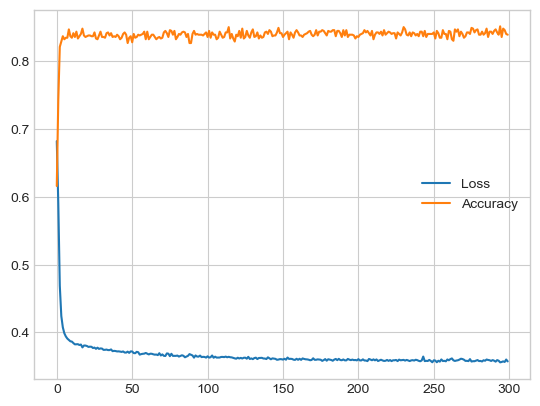

In [139]:
#绘制训练过程中的损失(Loss)和准确率(Accuracy)曲线

#plt.plot()：用于绘制图形。
#range(len(fit.history.get('loss')))：
#fit.history.get('loss') 是训练过程中每一轮（epoch）的损失值（loss）。
#len(fit.history.get('loss')) 获取损失值列表的长度，即训练的轮数（epochs）。
#range(len(fit.history.get('loss'))): 生成从 0 到训练轮数减一的整数列表，这些整数表示每个 epoch 对应的 x 轴坐标。
#例如，如果训练了 300 轮，则 range(300) 生成的是从 0 到 299 的整数列表。

plt.plot(range(len(fit.history.get('loss'))),fit.history.get('loss'),label='Loss')

#accuracy同理
plt.plot(range(len(fit.history.get('accuracy'))),fit.history.get('accuracy'),label='Accuracy')

#绘制图例
plt.legend()
plt.show()

**解释图形中的走势**

损失曲线（Loss Curve）：通常，随着训练的进行，损失值会逐渐下降，表示模型在训练集上的表现逐渐提高。
准确率曲线（Accuracy Curve）：通常，随着训练进行，准确率会逐渐增加，表示模型对训练数据的预测能力在提升。
如果两者的曲线都没有显著变化，可能表示模型没有有效学习；如果损失下降且准确率上升，说明模型正在有效学习。如果准确率变高但损失不再下降，则可能发生了过拟合。

In [141]:
#使用训练好的神经网络模型进行预测并保存为CSV文件

#(classifier) 对 测试集数据（final_test） 进行预测。
#predict() 方法将返回一个 概率值，表示每个样本属于 类别 1（即生存）的概率（由于是二分类问题，输出的值介于 0 和 1 之间）。
#预测结果是一个二维数组，每个样本的输出是一个概率值。

y_pred = classifier.predict(final_test)

#y_pred 之前是模型输出的概率值，范围从 0 到 1。为了将概率值转化为 类别标签（0 或 1），我们使用阈值 0.5：
#如果概率小于 0.5，则预测为 0（未生存）。
#如果概率大于或等于 0.5，则预测为 1（幸存）。

y_pred = [0 if y< 0.5 else 1 for y in y_pred]

#将预测结果转换为DataFrame
y_pred = pd.DataFrame(y_pred)

#创建一个包含 乘客 ID（PassengerId） 和 预测的生存情况（Survived） 的 DataFrame
result = pd.DataFrame({'PassengerId': df_test['PassengerId'].values, 'Survived':y_pred[0]})

#保存结果为CSV
result.to_csv(r"C:\Users\16925\Desktop\Kaggle\Titanic\ANN-submission.csv", index=False)
result.head(10)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# 4 与其他模型对比得分

## 4.1 常用机器学习算法

In [156]:
#使用Scikit-learn 和 LightGBM 库进行训练 评估和比较

#导入相关库
#sklearn.ensemble: 包含多个集成学习方法，如随机森林（RandomForest）、AdaBoost、GradientBoosting 等。
#sklearn.svm: 包含支持向量机（SVM）相关的功能。
#sklearn.neighbors: 包含 K 最近邻（KNN）分类器。
#sklearn.naive_bayes: 包含高斯朴素贝叶斯分类器（GaussianNB）。
#sklearn.linear_model: 包含各种线性模型，如线性回归（LinearRegression）、逻辑回归（LogisticRegression）等。
#sklearn.tree: 包含决策树分类器（DecisionTreeClassifier）。
#lightgbm.LGBMClassifier: LightGBM 是一种快速的、基于树的梯度提升模型（GBDT），用于分类任务。

import sklearn.ensemble as ske
from sklearn import datasets, model_selection,tree,preprocessing,metrics,linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

#GridSearchCV：进行 网格搜索，通过穷举所有可能的超参数组合，寻找最佳模型参数。
#RandomizedSearchCV：进行 随机搜索，从超参数空间中随机选择参数进行搜索，通常比网格搜索更高效，特别是在参数空间较大时。
#cross_val_score：进行 交叉验证，评估不同模型在验证集上的表现。
#StratifiedKFold：交叉验证中的一种方法，保持每个划分的目标变量类别分布与整个数据集的分布一致，适用于不平衡数据集。
#如果一个类别的样本数量远远大于另一个类别，这就意味着数据集可能是不平衡的。

from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
 
#precision_recall_fscore_support
#功能：这个函数计算 精确度（precision）、召回率（recall） 和 F1-score 以及它们的支持度（support）。

from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

#设置交叉验证的KFold
#StratifiedKFold(n_splits=10)：使用 分层 K 折交叉验证，将数据集分成 10 个子集（fold），并确保每个子集中的类别分布与整体数据集的类别分布相同。

kfold = StratifiedKFold(n_splits=10)

#创建一个包含多个分类器的列表
#classifiers 列表包含了不同的机器学习模型，每个模型将用于进行训练和评估。
#SVC：支持向量机分类器。
#DecisionTreeClassifier：决策树分类器。
#RandomForestClassifier：随机森林分类器。
#ExtraTreesClassifier：极端随机森林分类器（与随机森林类似，但在生成树时使用更大的随机性）。
#GradientBoostingClassifier：梯度提升分类器，通常能够提高模型性能。
#KNeighborsClassifier：K 最近邻分类器。
#LogisticRegression：逻辑回归分类器。
#LGBMClassifier：LightGBM 分类器，基于梯度提升树。

classifiers = []
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LGBMClassifier())

#使用交叉验证评估各个模型
#cross_val_score()：通过交叉验证对每个模型进行评估，返回模型在验证集上的得分。这里使用的是 准确率（accuracy） 作为评分指标。
#X_train：训练数据的特征。
#y_train：训练数据的标签（即目标变量）。
#scoring='accuracy'：使用准确率作为评估标准。
#cv=kfold：使用之前定义的 StratifiedKFold 进行交叉验证。
#n_jobs=-1：使用所有可用的 CPU 核心来并行计算加速交叉验证过程。

cv_results = []
for classifiers in classifiers:
    cv_results.append(cross_val_score(classifiers,X_train,y_train,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))

#汇总不同模型的交叉验证结果


In [157]:
#计算平均准确率和标准差
cv_means = []
cv_std = []
for cv_result in cv_results:
    #append是将元素添加到列表末尾
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cvDf = pd.DataFrame({'cv_mean': cv_means,
                     'cv_std':cv_std,
                     #'algorithm'是模型名称
                     'algorithm':['SVC', 'DecisionTreeCla', 'RandomForestCla', 'ExtraTreesCla',
                                  'GradientBoostingCla', 'KNN', 'LR', 'LGBMClassifier']})
cvDf = cvDf.sort_values('cv_mean',ascending = False)
cvDf


,cv_mean,cv_std,algorithm
6,0.830537,0.031099,LR
4,0.827179,0.035143,GradientBoostingCla
5,0.824931,0.030956,KNN
3,0.823833,0.033472,ExtraTreesCla
0,0.823795,0.030980,SVC
1,0.821586,0.032493,DecisionTreeCla
7,0.821573,0.036942,LGBMClassifier
2,0.819338,0.027913,RandomForestCla


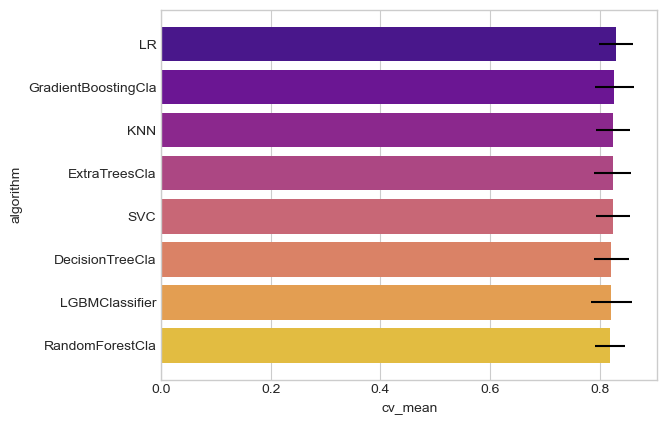

In [184]:
#绘制各个模型的交叉验证结果
#xerr=cv_std：为每个条形图添加横向误差条，表示模型准确率的标准差，显示每个模型的稳定性。
#yerr和xerr分别代表y方向和x方向的误差条
#例如yerr = [0.5, 0.7, 0.3, 0.4, 0.6]  # y轴方向的误差
#xerr = [0.2, 0.3, 0.1, 0.3, 0.4]  # x轴方向的误差
#sns.barplot，它默认情况下并不直接支持 xerr 或 yerr 参数来添加误差条。如果你想为条形图添加误差条，你需要使用 matplotlib 的 bar 函数，并结合 seaborn 进行绘制。seaborn 的 barplot 默认会计算误差条，但如果你希望手动指定误差条（比如使用 cv_std 作为标准差），可以通过 matplotlib 自定义误差条。

sns.barplot(data=cvDf,x='cv_mean',y='algorithm',palette='plasma')
# 添加误差条
plt.errorbar(x=cvDf['cv_mean'], 
             y=np.arange(len(cvDf)), #y=np.arange(len(cvDf)): 误差条的纵坐标是条形图的位置，可以用 np.arange(len(cvDf)) 来设置。
             xerr=cvDf['cv_std'], 
             fmt='none',  # 不绘制点
             ecolor='black',  # 误差条颜色
             #capsize=5,  # 误差条端点的大小
             linestyle='-')  # 误差条的线型
plt.show()

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
0.8372534332084894 {'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 200}


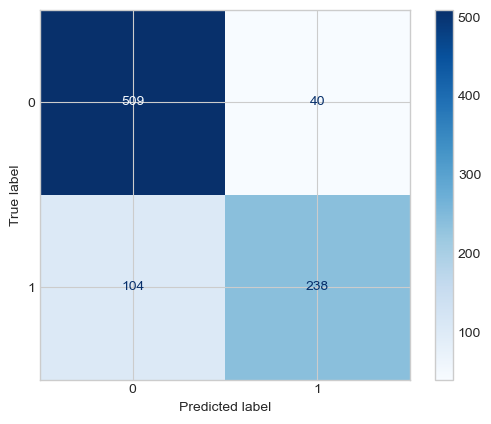

In [190]:
#可以看出LR表现较好 再选一个增强模型GBC进行对比
#GradientBoostingClassifier 是一种常用的集成学习方法，通过多个决策树的加权组合来进行分类预测。它是基于梯度提升算法（Gradient Boosting）的实现。
#random_state=seed: 设置随机种子 seed，确保实验可重复。

GBC = GradientBoostingClassifier(random_state=seed)

#定义超参数网格 gb_param_grid
#'loss': 损失函数，应该使用 log_loss 或 exponential。
#'n_estimators': 提升的弱学习器（树）的数量，设置为 [50, 100, 200]，表示尝试使用50、100和200个树。
#'learning_rate': 学习率，控制每棵树对最终结果的贡献，值较小时可能需要更多的树才能收敛。
#'max_depth': 每棵树的最大深度，设置为 [4, 8, 16]，以避免过拟合或欠拟合。
#'min_samples_leaf': 叶节点的最小样本数，防止树的过拟合，值较大时会使树的结构更加简单。
#'max_features': 每棵树在分裂节点时考虑的特征数量的比例（或数量），设置为 [0.3, 0.1]，这可以控制模型的复杂性和多样性。

gb_param_grid = {'loss':["log_loss"],
                 'n_estimators':[50,100,200],
                 'learning_rate':[0.5,0.1,0.05,0.01],
#这是常用的一个范围。如果你有先前的经验或数据集特性，可能会尝试其他的学习率值，如更大的值（0.8、0.9）或更小的值（0.001、0.005），具体取决于任务的性质。
                 'max_depth': [4, 8, 16],
                 'min_samples_leaf': [100, 150, 200],
                 'max_features': [0.3, 0.1]
                }
#较小的 max_features 值（如 0.1 或 0.3）意味着每棵树在选择分裂特征时只会考虑一小部分特征，这有助于增加模型的多样性，减少过拟合的风险，同时可以加快训练过程。
#较大的 max_features 值（如 0.5 或 1.0）意味着每棵树将会考虑更多的特征，有助于提升每棵树的预测能力，但这也可能导致模型变得更加复杂，容易过拟合。

#网格搜索与交叉验证
#GridSearchCV 是一种超参数优化方法，它通过遍历给定的超参数网格，使用交叉验证 (cv=kfold) 计算每个参数组合的得分，并返回最佳的超参数组合。
#param_grid=gb_param_grid: 定义的超参数网格。 verbose=1: 打印详细的运行信息，值越大信息越多。

modelgsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=kfold,
                          scoring="accuracy",n_jobs=-1,verbose=1)

#拟合模型并获取最佳参数
#modelgsGBC.best_params_: 获取最优超参数组合。
modelgsGBC.fit(X_train,y_train)
modelgsGBC_accuracy = modelgsGBC.best_score_
modelgsGBC_parameters = modelgsGBC.best_params_

#输出最佳准确率和参数
print(modelgsGBC_accuracy,modelgsGBC_parameters)

#绘制混淆矩阵
#confusion_matrix: 计算混淆矩阵，用于评估分类模型的性能。它表示预测的类别与实际类别之间的关系。
#ConfusionMatrixDisplay: 绘制混淆矩阵。
#cmap=plt.cm.Blues: 设置混淆矩阵的颜色映射，Blues 代表蓝色系的渐变。

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(modelgsGBC, X_train, y_train, cmap=plt.cm.Blues)

plt.show()

真正例 (True Positive, TP)：实际为正类且被预测为正类的样本。
假正例 (False Positive, FP)：实际为负类但被预测为正类的样本。
真反例 (True Negative, TN)：实际为负类且被预测为负类的样本。
假反例 (False Negative, FN)：实际为正类但被预测为负类的样本。
左上角 (0,0) 为 509：表示 True Negative (TN)，即模型正确预测了 509 个负类样本为负类。
右上角 (0,1) 为 40：表示 False Positive (FP)，即模型错误地将 40 个负类样本预测为正类。
左下角 (1,0) 为 104：表示 False Negative (FN)，即模型错误地将 104 个正类样本预测为负类。
右下角 (1,1) 为 238：表示 True Positive (TP)，即模型正确预测了 238 个正类样本为正类。
真正例 (TP)：238 个正类样本被正确预测为正类。
假正例 (FP)：40 个负类样本被错误地预测为正类。
真反例 (TN)：509 个负类样本被正确预测为负类。
假反例 (FN)：104 个正类样本被错误地预测为负类。
模型准确率 (Accuracy)：模型正确预测的样本数占总样本数的比例。

准确率 = (TP + TN) / 总样本数 = (238 + 509) / (509 + 40 + 104 + 238) ≈ 0.839

精确率 (Precision)：在所有被预测为正类的样本中，实际为正类的比例。

精确率 = TP / (TP + FP) = 238 / (238 + 40) ≈ 0.857

召回率 (Recall)：在所有实际为正类的样本中，正确预测为正类的比例。

召回率 = TP / (TP + FN) = 238 / (238 + 104) ≈ 0.696

[LibLinear]

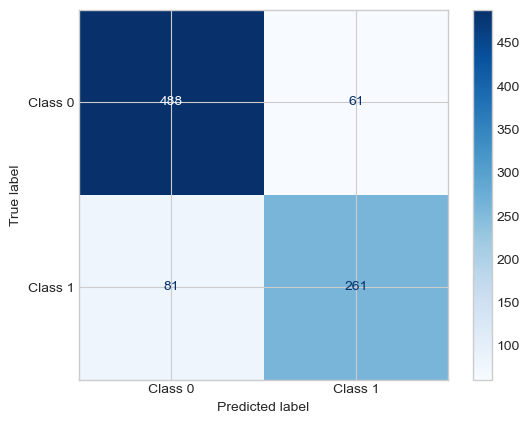

In [191]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 创建并训练逻辑回归模型
lr = LogisticRegression(
    C=1.0,  # 正则化强度，越大表示越弱的正则化，越小表示越强的正则化
    class_weight=None,  # 类别权重，默认为None，表示不调整类别权重
    dual=False,  # 是否使用对偶形式求解，只在二分类问题中使用
    fit_intercept=True,  # 是否计算截距项（通常为True）
    intercept_scaling=1,  # 截距项的缩放因子（通常保持为1）
    max_iter=100,  # 最大迭代次数，用于求解优化问题
    multi_class='ovr',  # 多类别处理方法，'ovr'表示一对多策略
    n_jobs=-1,  # 使用所有可用的核心进行并行计算
    penalty='l2',  # 使用L2正则化（L2正则化是一种常用的正则化方法，能防止过拟合）
    random_state=seed,  # 随机种子，确保每次训练结果一致
    solver='liblinear',  # 使用liblinear优化算法（适用于小规模数据集）
    tol=0.0001,  # 收敛阈值，用于控制算法停止的条件
    verbose=1,  # 输出详细的训练过程信息
    warm_start=False  # 是否使用之前的解进行训练（False表示重新训练）
)

# 训练模型
lr.fit(X_train, y_train)

# 生成混淆矩阵
cm = confusion_matrix(y_train, lr.predict(X_train))

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp2.plot(cmap=plt.cm.Blues)

# 显示图形
plt.show()


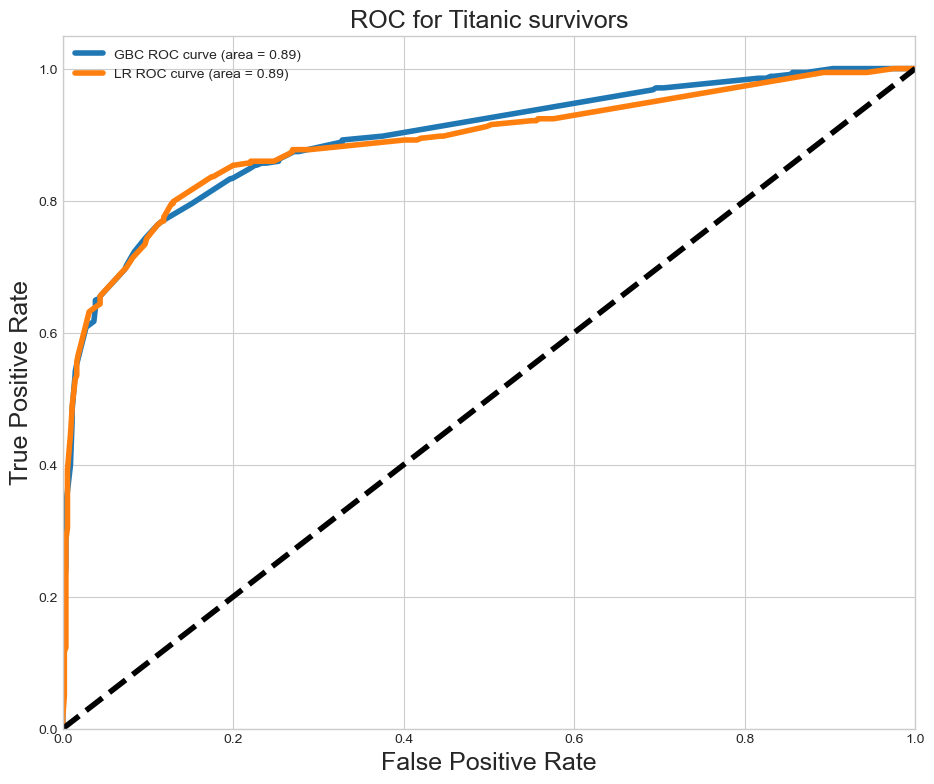

0.8949152632644148
0.8887264457439896


In [196]:
#计算ROC曲线和AUC
#roc_curve 用于计算 ROC 曲线，即在不同的分类阈值下，模型的 假正率 (False Positive Rate, FPR) 和 真正率 (True Positive Rate, TPR)。
#auc 用于计算 AUC，即 ROC 曲线下的面积，表示模型的整体表现，AUC 值越高，表示模型越好。
from sklearn.metrics import roc_curve,auc

#获取模型预测的概率
#modelgsGBC.predict_proba(X_train) 返回模型的预测概率，[:, 1] 表示获取 正类（Class 1） 的预测概率。y_score1 和 y_score2 分别是 GradientBoostingClassifier 和 LogisticRegression 模型在训练集 X_train 上预测为正类的概率。
y_score1=modelgsGBC.predict_proba(X_train)[:,1]
y_score2=lr.predict_proba(X_train)[:,1]

#FPR1 是假正率，TPR1 是真正率，_ 是用于计算阈值的列表
FPR1, TPR1, _ = roc_curve(y_train, y_score1)
FPR2, TPR2, _ = roc_curve(y_train, y_score2)

#计算AUC
ROC_AUC1 = auc(FPR1, TPR1)
ROC_AUC2 = auc(FPR2, TPR2)

#绘制ROC曲线
plt.figure(figsize=[11,9])
plt.plot(FPR1, TPR1, label='GBC ROC curve (area = %0.2f)' % ROC_AUC1, linewidth=4)
plt.plot(FPR2, TPR2, label='LR ROC curve (area = %0.2f)' % ROC_AUC2, linewidth=4)
plt.legend()
#绘制一个对角线（k-- 表示黑色虚线），这条线代表 随机猜测 的情况，如果模型的 ROC 曲线接近这条线，说明模型性能差。
plt.plot([0,1], [0,1], 'k--', linewidth=4)
#plt.xlim([0.0, 1.0]) 和 plt.ylim([0.0, 1.05])：设置坐标轴的范围。
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Titanic survivors', fontsize=18)
plt.show()
#AUC = 0.5 表示模型的预测能力与随机猜测无异。
#AUC = 1.0 表示完美的分类器。
print(ROC_AUC1) 
print(ROC_AUC2) 

In [198]:
y_pred=modelgsGBC.predict(final_test)
y_pred=y_pred.astype(int)

In [200]:
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].values, 'Survived':y_pred})
result.to_csv(r"C:\Users\16925\Desktop\Kaggle\Titanic\GBC-submission.csv", index=False)
print(result['Survived'].value_counts())
result.head(10)

Survived
0    289
1    129
Name: count, dtype: int64


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
